<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Introdu%C3%A7%C3%A3o_Python/Trabalho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlretrieve
from IPython.display import YouTubeVideo

In [2]:
## Exercicio 1 - Regressão linear em duas partes

URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')



('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7f4f2ff56690>)

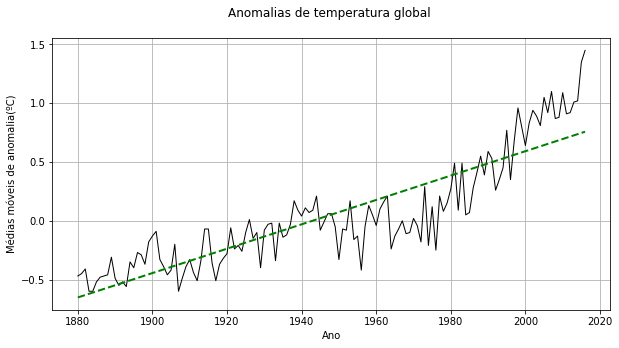

In [3]:
fname = 'land_global_temperature_anomaly-1880-2016.csv'
year, temp_anomaly = np.loadtxt(fname, delimiter = ',', skiprows= 5, unpack = True)

a, b = np.polyfit(year, temp_anomaly, 1) # polyfit(x,y,grau da regressão - nesse caso linear (1))
f_linear = np.poly1d((a, b))  # Resulta na equação de regressão linear reg_lin = b + ax

plt.figure( figsize = (10,5))
plt.plot (year, temp_anomaly, color = 'black', linestyle = '-', linewidth = 1)
plt.plot(year, f_linear(year), 'green', linestyle = '--', linewidth = 2)
plt.title('Anomalias de temperatura global \n')
plt.xlabel('Ano')
plt.ylabel('Médias móveis de anomalia(ºC)')
plt.grid()

# Exercício 1 - Dividir a regressão linear em duas partes, conforme a imagem abaixo.

Se você olhar o gráfico acima, poderá notar que por volta de 1970 a temperatura começa a aumentar mais rápido do que a tendência anterior. Portanto, talvez uma única linha reta não nos dê um ajuste bom o suficiente.

E se quebrarmos os dados em dois (antes e depois de 1970) e fizermos uma regressão linear em cada segmento?

Para fazer isso, primeiro precisamos encontrar a posição em nosso array `year` onde o ano 1970 está localizado. Felizmente, o NumPy tem uma função chamada [`numpy.where ()`] (https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) que pode nos ajudar. Passamos uma condição e `numpy.where ()` diz-nos onde no array a condição é `True`.

### Enunciado: Dividir a regressão linear em duas partes, conforme a imagem abaixo:

![graf-2partes.png](https://www.dropbox.com/s/5lzr2s43hhgbteg/graf-2partes.png?dl=1)

90


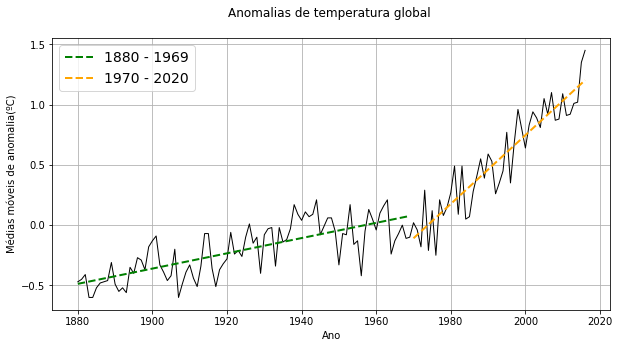

In [4]:

for i in range (len(year)): # Check the index for year 1970
  if year[i] == 1970:
    print(i)

year_1970 = year[0:90]
year_resto = year[90:]

temp_anomaly_1970 = temp_anomaly[0:90]
temp_anomaly_resto = temp_anomaly[90:]


a_1970, b_1970 = np.polyfit(year_1970, temp_anomaly_1970, 1) # polyfit(x,y,grau da regressão - nesse caso linear (1))
f_linear_1970 = np.poly1d((a_1970, b_1970))  # Resulta na equação de regressão linear reg_lin = b + ax*

a_resto, b_resto = np.polyfit(year_resto, temp_anomaly_resto, 1) # polyfit(x,y,grau da regressão - nesse caso linear (1))
f_linear_resto = np.poly1d((a_resto, b_resto))  # Resulta na equação de regressão linear reg_lin = b + ax*

plt.figure(figsize = (10,5))
plt.plot(year, temp_anomaly, 'black', linewidth = 1)
plt.plot(year_1970, f_linear_1970(year_1970), 'green', linestyle = '--', linewidth = 2, label = '1880 - 1969')
plt.plot(year_resto, f_linear_resto(year_resto), 'orange', linestyle = '--', linewidth = 2, label = '1970 - 2020')
plt.legend(loc = 'best', fontsize = 14)
plt.title('Anomalias de temperatura global \n')
plt.xlabel('Ano')
plt.ylabel('Médias móveis de anomalia(ºC)')
plt.grid()


# Exercício 2 - Calcular o coeficiente de correlação de Pearson para cada um dos casos:
1) uma regressão linear

2) duas regressões lineares, nesse caso fazer a média dos coeficientes de correlação

Qual é o melhor ajuste de curvas? uma regressão linear ou duas? Use o coeficiente de correlação de Pearson para justificar sua resposta.

Para calcular o coeficiente de correlação de Pearson você pode usar duas bibliotecas: Numpy e Scipy.

Veja o manual de cada uma das funções (pearsonr e corrcoef) e resolva o exercício.

* [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
* [numpy.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

In [5]:
# Determinar o coeficiente de correlação de pearson e o coeficiente de determinação (R²)


coef_corr_comp = scipy.stats.pearsonr(temp_anomaly, f_linear(year)) # Retorna uma tupla com a correlação, e p-value

coef_corr_1970 = scipy.stats.pearsonr(temp_anomaly_1970, f_linear_1970(year_1970))
coef_corr_resto = scipy.stats.pearsonr(temp_anomaly_resto, f_linear_resto(year_resto))
coef_corr_med = np.mean((coef_corr_1970[0],coef_corr_resto[0]))

coef_det_comp = coef_corr_comp[0] **2

coef_det_med = coef_corr_med **2


print('O coeficiente de correlação para uma regressão é: ' + str(coef_corr_comp[0]) + '\n'
 + 'O coeficiente de correlação para a média entre as duas regressões é: ' + str(coef_corr_med) + '\n' 
 + 'Os coeficientes de determinação (R²) para cada um dos casos acima, respectivamente são: ' +str(coef_det_comp)
 +' e ' + str(coef_det_med)) 



O coeficiente de correlação para uma regressão é: 0.8749403673678436
O coeficiente de correlação para a média entre as duas regressões é: 0.8344285251498132
Os coeficientes de determinação (R²) para cada um dos casos acima, respectivamente são: 0.7655206464497772 e 0.6962709635836926


# Exercício 3 - A regressão não linear em dados de CO$_2$ na atmosfera

#### Dados de Concentrações de Dióxido de Carbono Atmosférico CO$_2$ em partes por milhão (ppm)

**Fonte** :https://datahub.io/core/co2-ppm#resource-co2-ppm_zip

Os dados são provenientes do Laboratório de Pesquisa do Sistema Terrestre do Governo dos EUA, Divisão de Monitoramento Global. Duas séries principais são fornecidas: a série Mauna Loa (que tem a série contínua mais longa desde 1958) e uma série da média global (uma média global sobre locais de superfície marinhos).

1. Trends in Atmospheric Carbon Dioxide, Mauna Loa, Hawaii. Dr. Pieter Tans, NOAA/ESRL (www.esrl.noaa.gov/gmd/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/).

2. Trends in Atmospheric Carbon Dioxide, Global. Ed Dlugokencky and Pieter Tans, NOAA/ESRL (www.esrl.noaa.gov/gmd/ccgg/trends/).

In [6]:
# importação dos dados (O Prof. Emílio baixou os dados de Mauna Loa, Hawaii. Iremos trabalhar com esses dados)
URL = 'https://www.dropbox.com/s/7o6c7rlhzd0gd19/co2-mm-mlo_csv3.csv?dl=1'
urlretrieve(URL, 'co2-mm-mlo_csv3.csv')
fname = 'co2-mm-mlo_csv3.csv'
Year,Mean = np.loadtxt(fname, delimiter=',', skiprows=1, unpack=True)

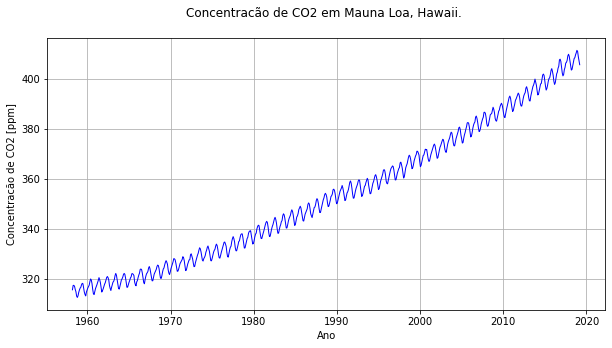

In [7]:
plt.figure(figsize=(10,5))
plt.plot(Year,Mean,color='blue', linestyle='-', linewidth=1)
plt.title('Concentracão de CO2 em Mauna Loa, Hawaii. \n')
plt.xlabel('Ano')
plt.ylabel('Concentracão de CO2 [ppm]')
plt.grid();


#### **Enunciado exercício 3**: Qual regressão linear que melhor se ajusta aos dados de CO$_2$ na atmosfera?

a) Regressão Linear?

b) Regressão não linear (quadrática)?

c) Outra?

In [8]:
# Regressão linear 

a_linear, b_linear = np.polyfit(Year, Mean, 1)
reg_lin = np.poly1d((a_linear, b_linear))

coef_corr_lin = scipy.stats.pearsonr(Mean, reg_lin(Year)) # Coeficiente de correlação (Linear)
print('O coeficiente de correlação linear é: ' + str(coef_corr_lin[0]))

# Regressão quadrática

a1_quad, a_quad, b_quad = np.polyfit(Year, Mean, 2)
reg_quad = np.poly1d((a1_quad, a_quad, b_quad))

coef_corr_quad = scipy.stats.pearsonr(Mean, reg_quad(Year)) # Coeficiente de correlação (Quad)
print('O coeficiente de correlação quadrática é: ' + str(coef_corr_quad[0]))

# # Regressão cúbica

a2_cub, a1_cub, a_cub, b_cub = np.polyfit(Year, Mean, 3)
reg_cub = np.poly1d((a2_cub, a1_cub, a_cub, b_cub))

coef_corr_cub = scipy.stats.pearsonr(Mean, reg_cub(Year)) # Coeficiente de correlação (Cubica)
print('O coeficiente de correlação cúbica é: ' + str(coef_corr_cub[0]))




O coeficiente de correlação linear é: 0.9886735075522145
O coeficiente de correlação quadrática é: 0.9967416233376151
O coeficiente de correlação cúbica é: 0.9967429628564769


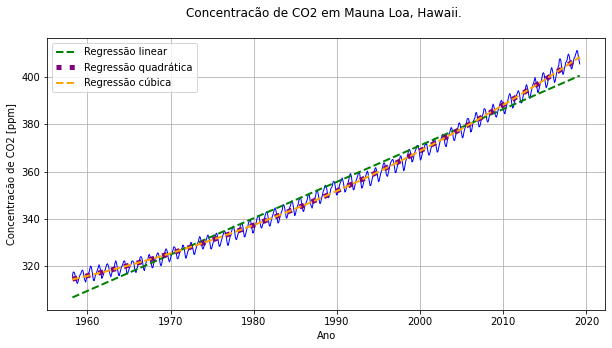

In [9]:
# Plot das regressões

plt.figure(figsize=(10,5))
plt.plot(Year,Mean,color='blue', linestyle='-', linewidth=1)
plt.plot(Year, reg_lin(Year), 'green', linestyle = '--', linewidth = 2, label = 'Regressão linear')
plt.plot(Year, reg_quad(Year), 'purple', linestyle = 'dotted', linewidth = 5, label = 'Regressão quadrática')
plt.plot(Year, reg_cub(Year), 'orange', linestyle = '--', linewidth = 2, label = 'Regressão cúbica')
plt.title('Concentracão de CO2 em Mauna Loa, Hawaii. \n')
plt.xlabel('Ano')
plt.ylabel('Concentracão de CO2 [ppm]')
plt.grid();
plt.legend(loc = 'best')

# Exercício 4 - Encontrando Raízes de equações com o Método da Bisseção

Encontre a raiz da equação $f(x) = x^2 - x - 1$ com o Método da Bisseção. Use $N = 25$ iterações e a busca da solução no intervalo $[1,2]$

Ajuda:
[Implementação do método da bisseção em Python](https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/)

Verifique que a solução é o número áureo, ver [Proporção aurea](https://pt.wikipedia.org/wiki/Propor%C3%A7%C3%A3o_%C3%A1urea).


In [21]:
def bisection (func, lower_bound, upper_bound, error_accepted): 
  '''
  func = string representing the function to be analysed
  lower_bound = lower boundary for the domain
  upper_bound = upper boundary of the domain
  error = acceptable error for the bisection method

  To identify more than one root, the intervals should be changed in order to do so
  '''


  def f(x):
    '''
    Transforms the string entered as the function to a 
    mathematical equation. eval() method.
    '''
    f = eval(func)
    return f

  if f(lower_bound) * f(upper_bound) >= 0:
    print ('Boundaries or function not adequate to bissection method')
    quit()
  
  error = abs(upper_bound - lower_bound)
  cont = 0 

  while error > error_accepted:
    
    new_bound = (upper_bound + lower_bound)/2

    if f(new_bound) * f(lower_bound) < 0:
      upper_bound = new_bound
      error = abs(upper_bound - lower_bound)

    elif f(new_bound) * f(upper_bound) < 0:
      lower_bound = new_bound
      error = abs(upper_bound - lower_bound)
    
    else:
      print('Something went wrong')
    
    cont += 1
      
  print (f'The error is {error}')
  print (f'The number of interactions are {cont}')
  print (f'The lower boundary is {lower_bound}, and the upper boundary is {upper_bound}')


bisection('x**2 - x - 1', 1, 2, 0.00000001)


The error is 7.450580596923828e-09
The number of interactions are 27
The lower boundary is 1.6180339828133583, and the upper boundary is 1.618033990263939


# Exercício 5 - Gráficos com Matplotlib

Acesse o [Matplotlib Help](https://matplotlib.org/3.3.1/tutorials/introductory/sample_plots.html) para informações básicas sobre gráficos.

### Para fazer subplots e gráficos de funções:

[Subplots e funções](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/subplot.html)

**Enunciado da questão 5**: Fazer uma figura contendo dois subplots. Cada subplot deverá conter as seguintes funções:

Subplot 1) $f(x) = \sin(2 \pi x) e^{-x}$ no intervalo de x: $[0,5]$

Subplot 2) $g(x) = \cos(2 \pi x) + x^2$ no intervalo de x: $[0,3]$

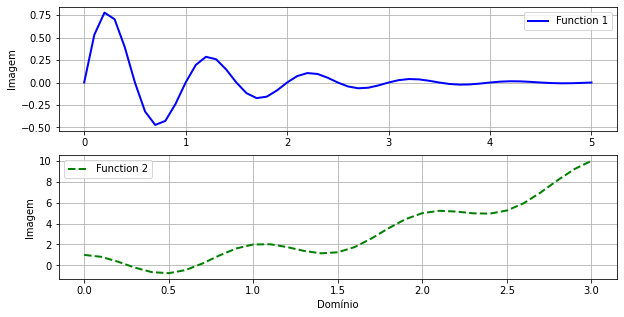

In [39]:
def subplots (func_1, lower_bound_1, upper_bound_1, func_2,  lower_bound_2, upper_bound_2, precision):
  '''
  func_1 = First function to be plotted. It must be entered as a string. If there is any special operations, such as trigonometry or exponential,
  it must be written with the necessary libraries to utilize them. 
  lower_bound_1 = Lower boundary of the domain regarding the first function
  upper_bound_1 = Upper boundary of the domain regarding the first function
  func_2, lower_bound_2, upper_bound_2 = same as above, however regarding the second function
  precision = Number of x and y points calculated
  '''

  def f_1 (x):
    f_1 = eval(func_1)
    return f_1
  
  def f_2 (x):
    f_2 = eval(func_2)
    return f_2

  points_1 = np.arange(lower_bound_1, upper_bound_1+precision, precision)
  points_2 = np.arange(lower_bound_2, upper_bound_2+precision, precision)

  y_func_1 = np.arange(lower_bound_1, upper_bound_1+precision, precision)
  y_func_2 = np.arange(lower_bound_2, upper_bound_2+precision, precision)

  for i in range (len(points_1)):
    y_func_1[i] = f_1(points_1[i])

  for i in range (len(points_2)):
    y_func_2[i] = f_2(points_2[i])

 
  plt.figure (figsize= (10,5))
  plt.subplot(211)
  plt.plot(points_1, y_func_1, 'blue', linestyle = '-', linewidth = 2, label = 'Function 1')
  plt.grid()
  plt.legend(loc = 'best')
  plt.ylabel('Imagem')
  plt.subplot(212)
  plt.plot(points_2, y_func_2, 'green', linestyle = '--', linewidth = 2, label = 'Function 2')
  plt.xlabel('Domínio')
  plt.ylabel('Imagem')
  plt.grid()
  plt.legend(loc = 'best')

subplots('np.sin(2 * np.pi * x) * np.exp(-x)', 0,5, 'np.cos(2 * np.pi * x) + x ** 2', 0, 3, 0.1)

# Exercício 6 - Gráficos com Matplotlib (interpolando imagens)

Acesse o [interpolando imagens](https://matplotlib.org/3.3.1/gallery/images_contours_and_fields/image_demo.html) e descreva o que cada linha do código abaixo está fazendo. 

Use a função help (Ex. help(zip)) caso precise.

Coloque um comentário em cada um das linhas do código abaixo explicando o que está sendo executado.

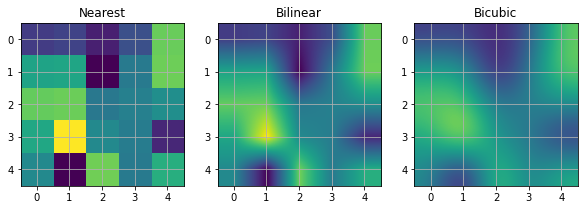

In [33]:
A = np.random.rand(5, 5) 
# Cria 5 arrays com 5 valores aleatórios dentro de um array maior

fig, axs = plt.subplots(1, 3, figsize=(10, 3)) 
# Define 3 espaços para gráfico com dimensão 1x1
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']): 
  # Define um loop utilizando duas variáveis e uma tupla de modo que a primeira variável ax é associada com o primeiro termo da tupla axs \
  # e a segunda variável interp é associada com o segundo termo da tupla a qual varia entre as strings da lista utilizada como segundo argumento
    ax.imshow(A, interpolation=interp)
    # Sobrescreve, define os pontos e retorna em escala de cores nos gráficos pré-definidos 
    ax.set_title(interp.capitalize())
    # Corrige o texto (se necessário) utilizado como título de cada um dos gráficos deixando maiúscula a primeira letra
    ax.grid(True)
    # Mostra a malha do gráfico

    
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f2be4aa50>,
      dtype=object)

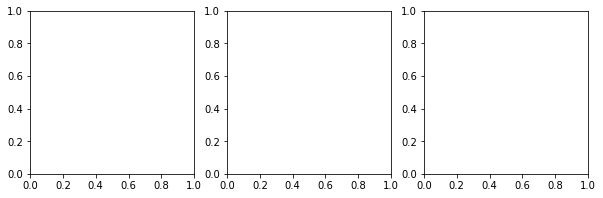

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs